In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import numpy as np
from scipy.signal import butter, filtfilt
import math

In [4]:
df = pd.read_csv('all_gyro_data_unfiltered.csv', sep=';')
df

,axis,motor_frequency,timestamp,gyro_value
0,X,100,2010759,-12.988
1,X,100,2010760,-13.415
2,X,100,2010761,-13.659
3,X,100,2010763,-12.683
4,X,100,2010765,-9.817
...,...,...,...,...
1188042,Z,75,1407490,0.366
1188043,Z,75,1407491,0.122
1188044,Z,75,1407492,0.610
1188045,Z,75,1407493,1.463


In [26]:
motor_frequencies = df['motor_frequency'].unique().tolist()
axis_list = df['axis'].unique().tolist()

In [28]:
for motor_freq in motor_frequencies:
    for axis in axis_list:
        data_dict = {
            'frequency': [],
            'power': []
        }
        _df = df.loc[df['motor_frequency']==motor_freq].loc[df['axis']==axis]
        gyro_data = _df['gyro_value'].to_numpy()
        fft_data = np.fft.fft(gyro_data)
        power_data = 10 * np.log10(np.abs(fft_data)**2)
        shifted_spectrum = np.fft.fftshift(power_data)
        shifted_frequencies = np.fft.fftshift(np.fft.fftfreq(len(gyro_data), 1/4000))
        positive_spectrum = shifted_spectrum[shifted_frequencies >= 0][1:]
        positive_frequencies = shifted_frequencies[shifted_frequencies >= 0][1:]
        data_dict['frequency'] = positive_frequencies
        data_dict['power'] = positive_spectrum
        _df = pd.DataFrame(data_dict)
        _df.to_csv(f'spectrum_{axis}_{motor_freq}.csv', sep=';', index=False)

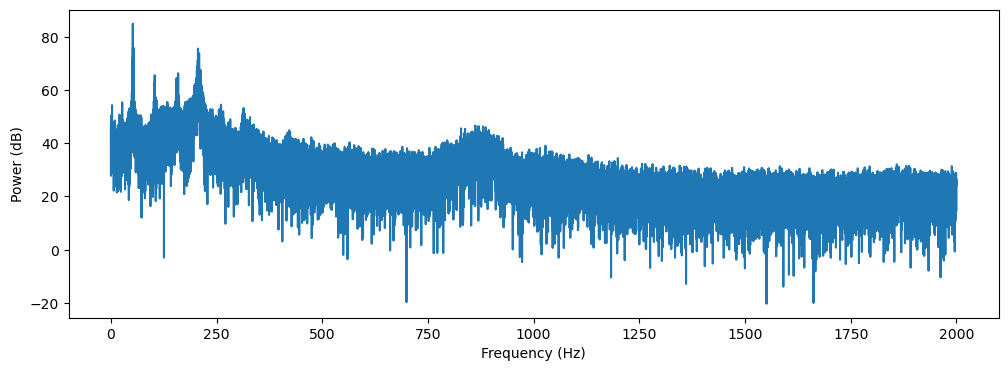

In [36]:
_df = pd.read_csv('spectrum_X_50.csv', sep=';')
plt.figure(figsize=(12, 4))
plt.plot(_df['frequency'].to_numpy(), _df['power'].to_numpy())
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.show()